<a href="https://colab.research.google.com/github/SnehaDharne/LearningAnalytics/blob/main/OULADDatasetPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/MyDrive/dataset for notebooks/dataset_for_project.csv'

In [ ]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(path)

<Axes: >

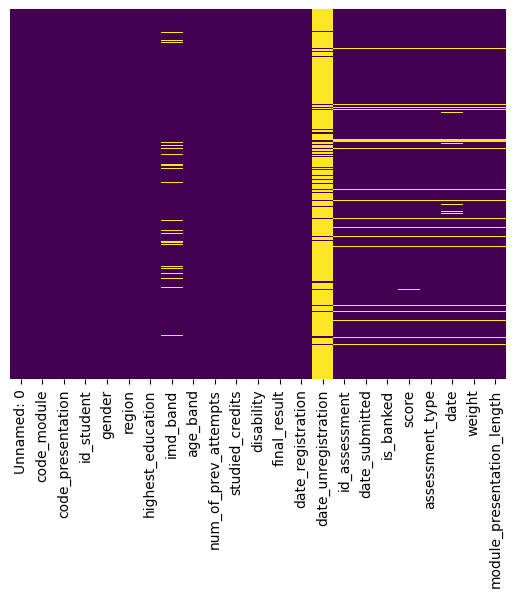

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.date_unregistration.describe()

count    18454.000000
mean        96.657852
std         87.739566
min       -365.000000
25%         13.000000
50%        107.000000
75%        166.000000
max        444.000000
Name: date_unregistration, dtype: float64

In [ ]:
fail_median = df.loc[df['final_result'] == 'Fail']['date_unregistration'].median()
withdrawn_median = df.loc[df['final_result'] == 'Withdrawn']['date_unregistration'].median()


# Impute missing values for fail and withdrawn classes with the medians
df.loc[(df['final_result'] == 'Fail') & (df['date_unregistration'].isna()), 'date_unregistration'] = fail_median
df.loc[(df['final_result'] == 'Withdrawn') & (df['date_unregistration'].isna()), 'date_unregistration'] = withdrawn_median

In [ ]:
df.date_unregistration.isnull().sum()

132372

In [ ]:
df.loc[(df['final_result'] == 'Pass') & (df['date_unregistration'].isna()), 'date_unregistration'] = 1000
df.loc[(df['final_result'] == 'Distinction') & (df['date_unregistration'].isna()), 'date_unregistration'] = 2000

In [ ]:
df.loc[df.final_result=='Withdrawn']['date_unregistration'].describe()

count    18558.000000
mean        96.760750
std         87.456068
min       -365.000000
25%         16.000000
50%        107.000000
75%        166.000000
max        444.000000
Name: date_unregistration, dtype: float64

In [ ]:
df.loc[df.final_result=='Pass' ]['date_unregistration'].describe()


count    106024.0
mean       1000.0
std           0.0
min        1000.0
25%        1000.0
50%        1000.0
75%        1000.0
max        1000.0
Name: date_unregistration, dtype: float64

In [ ]:
df.loc[df.date_unregistration==0 ]['final_result'].value_counts()


Fail         29742
Withdrawn      414
Name: final_result, dtype: int64

In [ ]:
df.date_unregistration.describe()

count    180662.000000
mean        742.550570
std         427.754142
min        -365.000000
25%         187.000000
50%        1000.000000
75%        1000.000000
max        1000.000000
Name: date_unregistration, dtype: float64

<Axes: >

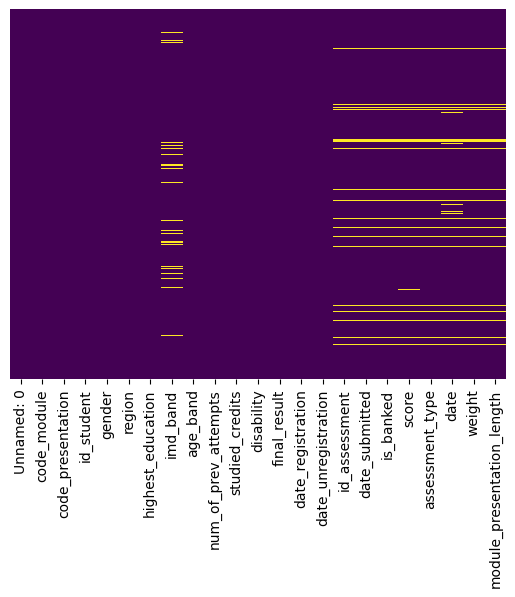

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# df.dropna(subset=['date_submitted'], inplace =True)
df.dropna(subset=['final_result'], inplace =True)


<Axes: >

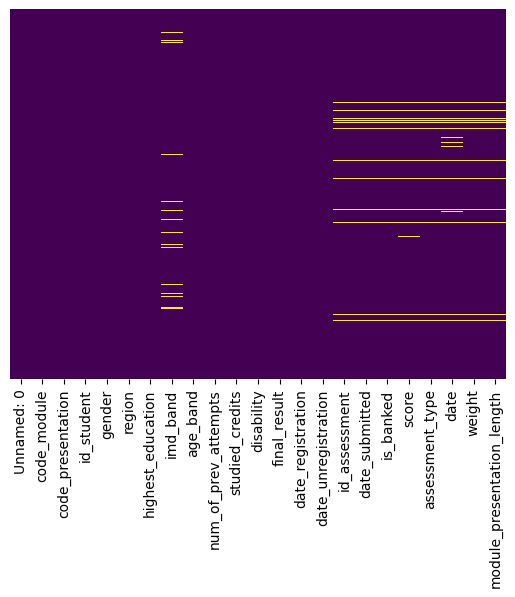

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      7810
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
date_registration               48
date_unregistration              0
id_assessment                 6750
date_submitted                6750
is_banked                     6750
score                         6923
assessment_type               6750
date                          9615
weight                        6750
module_presentation_length    6750
dtype: int64

In [ ]:
df.loc[df.score.isnull()]['final_result'].value_counts()

Withdrawn    5535
Fail         1351
Pass           37
Name: final_result, dtype: int64

In [ ]:

cols_with_missing = ['id_assessment', 'date_submitted', 'is_banked', 'score', 'assessment_type', 'date', 'weight', 'module_presentation_length']


for col in cols_with_missing:

    for label in ['Withdrawn', 'Fail', 'Pass', 'Distinction']:
       if df[col].dtype == 'O':
         mode = df.loc[df['final_result'] == label, col].mode().values[0]
         df.loc[(df['final_result'] == label) & (df[col].isnull()), col] = mode
       else:
          median = df.loc[df['final_result'] == label, col].median()
          df.loc[(df['final_result'] == label) & (df[col].isnull()), col] = median

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      7810
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
date_registration               48
date_unregistration              0
id_assessment                    0
date_submitted                   0
is_banked                        0
score                            0
assessment_type                  0
date                             0
weight                           0
module_presentation_length       0
dtype: int64

In [ ]:
#check for any other occurence of that particular student id to just impute its imd_band (no such student id)
null_imd = df.loc[df['imd_band'].isnull(), 'id_student'].unique()


for sid in null_imd:

    imd_vals = df.loc[(df['id_student'] == sid) & (df['imd_band'].notnull())]
    if len(imd_vals) > 0:

        print(f"Student ID {sid} has non-null IMD band value(s) of {imd_vals}")

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      7810
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
date_registration               48
date_unregistration              0
id_assessment                    0
date_submitted                   0
is_banked                        0
score                            0
assessment_type                  0
date                             0
weight                           0
module_presentation_length       0
dtype: int64

In [ ]:
df['id_student'].nunique()

28785

In [ ]:
# Create a new dataframe with unique student ids and their corresponding attributes
unique_df = df.groupby('id_student').first()[['region', 'highest_education', 'age_band', 'gender','disability', 'imd_band']]

In [ ]:
unique_df['imd_band'].isnull().sum()

971

In [ ]:
unique_df

,region,highest_education,age_band,gender,disability,imd_band
id_student,,,,,,
3733.0,South Region,HE Qualification,55<=,M,N,90-100%
6516.0,Scotland,HE Qualification,55<=,M,N,80-90%
8462.0,London Region,HE Qualification,55<=,M,N,30-40%
11391.0,East Anglian Region,HE Qualification,55<=,M,N,90-100%
23629.0,East Anglian Region,Lower Than A Level,0-35,F,N,20-30%
...,...,...,...,...,...,...
2698591.0,Wales,Lower Than A Level,35-55,F,N,90-100%
2702660.0,London Region,Lower Than A Level,0-35,F,N,50-60%
2707979.0,East Midlands Region,Lower Than A Level,0-35,F,N,60-70%


In [ ]:
features = unique_df.drop('imd_band', axis=1)

# Convert the categorical columns into numerical columns
features_encoded = pd.get_dummies(features)

# Combine the encoded features with the 'imd_band' column
encoded_df = pd.concat([features_encoded, unique_df['imd_band']], axis=1)

In [ ]:
encoded_df['imd_band'] = encoded_df['imd_band'].str.replace('Oct-20','10-20%')

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode

# Separate rows with missing values from the complete ones
missing_df = encoded_df[encoded_df['imd_band'].isna()]
complete_df = encoded_df.dropna()

# Get the feature columns to use in KNN imputation
feature_cols = complete_df.columns.tolist()
feature_cols.remove('imd_band')

# Fit a KNN model on the complete data
k = 5 # number of neighbors to use
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(complete_df[feature_cols])
# Define a function to calculate the mode that handles null values

for i, row in missing_df.iterrows():
  feature_values = np.array(row[feature_cols]).reshape(1, -1)
  distances, indices = knn_model.kneighbors(feature_values)
  neighbor_imd_bands = complete_df.iloc[indices[0]]['imd_band'].values
  unique_elements, element_counts = np.unique(neighbor_imd_bands, return_counts=True)
  mode_index = np.argmax(element_counts)
  mode_value = unique_elements[mode_index]
# Print the mode of the imd_band values from the neighbors
  missing_df.loc[i, 'imd_band'] = mode_value

# Get the feature values for the first row with missing values
# feature_values = np.array(missing_df[feature_cols].iloc[0]).reshape(1, -1)

# Find the top-k closest neighbors in the complete data


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, 

In [ ]:
missing_df

,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y,imd_band
id_student,,,,,,,,,,,,,,,,,,,,,,,,,,
29639.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,10-20%
37298.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,20-30%
40604.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,50-60%
43011.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,10-20%
46705.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,70-80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680988.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0-10%
2687989.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,10-20%
2692327.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,10-20%


In [ ]:
df.imd_band.isnull().value_counts()

False    172852
True       7810
Name: imd_band, dtype: int64

In [ ]:
df.loc[df.imd_band.isnull()]

,Unnamed: 0,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
41,41,AAA,2013J,53025.0,M,North Region,Post Graduate Qualification,NaN,55<=,0.0,60.0,N,Pass,-179.0,1000.0,1752.0,9.0,0.0,71.0,TMA,19.0,10.0,268.0
42,42,AAA,2013J,53025.0,M,North Region,Post Graduate Qualification,NaN,55<=,0.0,60.0,N,Pass,-179.0,1000.0,1753.0,52.0,0.0,80.0,TMA,54.0,20.0,268.0
43,43,AAA,2013J,53025.0,M,North Region,Post Graduate Qualification,NaN,55<=,0.0,60.0,N,Pass,-179.0,1000.0,1754.0,114.0,0.0,78.0,TMA,117.0,20.0,268.0
44,44,AAA,2013J,53025.0,M,North Region,Post Graduate Qualification,NaN,55<=,0.0,60.0,N,Pass,-179.0,1000.0,1755.0,161.0,0.0,80.0,TMA,166.0,20.0,268.0
45,45,AAA,2013J,53025.0,M,North Region,Post Graduate Qualification,NaN,55<=,0.0,60.0,N,Pass,-179.0,1000.0,1756.0,212.0,0.0,81.0,TMA,215.0,30.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179472,179472,GGG,2014J,683974.0,F,North Region,Lower Than A Level,NaN,0-35,0.0,30.0,N,Distinction,-28.0,1000.0,37439.0,137.0,0.0,100.0,CMA,229.0,0.0,269.0
179473,179473,GGG,2014J,683974.0,F,North Region,Lower Than A Level,NaN,0-35,0.0,30.0,N,Distinction,-28.0,1000.0,37440.0,157.0,0.0,100.0,CMA,229.0,0.0,269.0
179474,179474,GGG,2014J,683974.0,F,North Region,Lower Than A Level,NaN,0-35,0.0,30.0,N,Distinction,-28.0,1000.0,37441.0,200.0,0.0,100.0,CMA,229.0,0.0,269.0
179475,179475,GGG,2014J,683974.0,F,North Region,Lower Than A Level,NaN,0-35,0.0,30.0,N,Distinction,-28.0,1000.0,37442.0,203.0,0.0,80.0,CMA,229.0,0.0,269.0


In [ ]:
missing_df


,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y,imd_band
id_student,,,,,,,,,,,,,,,,,,,,,,,,,,
29639.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,10-20%
37298.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,20-30%
40604.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,50-60%
43011.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,10-20%
46705.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,70-80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680988.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0-10%
2687989.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,10-20%
2692327.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,10-20%


In [ ]:
#use missing df to fill in missing values in df
df['imd_band'] = df['imd_band'].fillna(df['id_student'].map(missing_df['imd_band']))


In [ ]:
df.isnull().sum()

Unnamed: 0                     0
code_module                    0
code_presentation              0
id_student                     0
gender                         0
region                         0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
studied_credits                0
disability                     0
final_result                   0
date_registration             48
date_unregistration            0
id_assessment                  0
date_submitted                 0
is_banked                      0
score                          0
assessment_type                0
date                           0
weight                         0
module_presentation_length     0
dtype: int64

In [ ]:
df.loc[df.date_registration.isnull()]['final_result'].value_counts()

Withdrawn    42
Fail          5
Pass          1
Name: final_result, dtype: int64

In [ ]:
df.date_registration.describe()

count    180614.000000
mean        -66.508909
std          47.402418
min        -322.000000
25%         -95.000000
50%         -53.000000
75%         -29.000000
max         167.000000
Name: date_registration, dtype: float64

In [ ]:
fail_median = df.loc[df['final_result'] == 'Fail']['date_registration'].median()
withdrawn_median = df.loc[df['final_result'] == 'Withdrawn']['date_registration'].median()
pass_median = df.loc[df['final_result'] == 'Pass']['date_registration'].median()

# Impute missing values for fail and withdrawn classes with the medians
df.loc[(df['final_result'] == 'Fail') & (df['date_registration'].isna()), 'date_registration'] = fail_median
df.loc[(df['final_result'] == 'Withdrawn') & (df['date_registration'].isna()), 'date_registration'] = withdrawn_median
df.loc[(df['final_result'] == 'Pass') & (df['date_registration'].isna()), 'date_registration'] = pass_median

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
date_registration             0
date_unregistration           0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
assessment_type               0
date                          0
weight                        0
module_presentation_length    0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,date,weight,module_presentation_length
count,180662.000000,1.806620e+05,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000,180662.000000
mean,90330.500000,7.049706e+05,0.146539,77.317726,-66.507384,742.550570,26508.645138,113.753540,0.010567,75.549263,128.113527,12.641380,255.363856
std,52152.771504,5.515387e+05,0.448563,37.924814,47.396242,427.754142,8666.293230,71.155926,0.102250,18.480143,77.194219,17.547866,14.326891
min,0.000000,3.733000e+03,0.000000,30.000000,-322.000000,-365.000000,1752.000000,-11.000000,0.000000,0.000000,12.000000,0.000000,-62.000000
25%,45165.250000,5.051990e+05,0.000000,60.000000,-95.000000,187.000000,15024.000000,48.000000,0.000000,66.000000,53.000000,0.000000,241.000000
50%,90330.500000,5.855030e+05,0.000000,60.000000,-53.000000,1000.000000,25355.000000,110.000000,0.000000,79.000000,124.000000,10.000000,261.000000
75%,135495.750000,6.346460e+05,0.000000,90.000000,-29.000000,1000.000000,34881.000000,171.000000,0.000000,89.000000,208.000000,18.000000,268.000000
max,180661.000000,2.716795e+06,6.000000,655.000000,167.000000,1000.000000,37443.000000,608.000000,1.000000,100.000000,261.000000,100.000000,269.000000


In [ ]:
df.head()

,Unnamed: 0,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
0,0,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,268.0
1,1,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,268.0
2,2,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,268.0
3,3,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,268.0
4,4,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,268.0


In [ ]:
df.drop(columns='Unnamed: 0', inplace = True)

In [ ]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,268.0
1,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,268.0
2,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,268.0
3,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,268.0
4,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,N,Pass,-159.0,1000.0,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,268.0


In [ ]:
df.to_csv('/content/drive/MyDrive/dataset for notebooks/imputed_data.csv', index = False)

In [ ]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'id_assessment', 'date_submitted', 'is_banked',
       'score', 'assessment_type', 'date', 'weight',
       'module_presentation_length'],
      dtype='object')